In [91]:
from sklearn.datasets import load_breast_cancer
# Load the dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # target labels (0 for malignant, 1 for benign)

# Optionally, display the description - uncomment the following line to do so
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
import numpy as np

def sigmoid(x):
    z = np.clip( x, -500, 500 )           # protect against overflow
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
def compute_cost_logistic(X, y, w, b, lambda_=0, safe=False):
    """
    Computes cost using logistic loss, non-matrix version

    Args:
      X (ndarray): Shape (m,n)  matrix of examples with n features
      y (ndarray): Shape (m,)   target values
      w (ndarray): Shape (n,)   parameters for prediction
      b (scalar):               parameter  for prediction
      lambda_ : (scalar, float) Controls amount of regularization, 0 = no regularization
      safe : (boolean)          True-selects under/overflow safe algorithm
    Returns:
      cost (scalar): cost
    """

    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i    = np.dot(X[i],w) + b                                             #(n,)(n,) or (n,) ()
        if safe:  #avoids overflows
            cost += -(y[i] * z_i ) + log_1pexp(z_i)
        else:
            f_wb_i = sigmoid(z_i)                                                   #(n,)
            # Added small value to avoid log(0)
            cost += -y[i] * np.log(f_wb_i + 1e-10) - (1 - y[i]) * np.log(1 - f_wb_i + 1e-10)
    cost = cost/m

    reg_cost = 0
    if lambda_ != 0:
        for j in range(n):
            reg_cost += (w[j]**2)                                               # scalar
        reg_cost = (lambda_/(2*m))*reg_cost

    return cost + reg_cost

In [114]:
import numpy as np

def calculate_gradient_for_loop(X, y, w, b, l):
    m, n = X.shape
    dw = np.zeros((n,))  # initialize the gradient vector
    db = 0.              # initialize the intercept gradient
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        a = sigmoid(z)
        dz = a - y[i]
        for j in range(n):
            dw[j] += X[i][j] * dz + l/m * w[j]
        db += dz
    return dw / m, db / m


In [111]:
import copy, math

def logistic_model(X, y, w_initial, b_initial, learning_rate=0.01, num_iterations=1000, l=0.0):
    J_history = []
    w = copy.deepcopy(w_initial)
    b = b_initial
    n = X.shape[1]
    
    for i in range(num_iterations):
        # Calculate the predicted values
        dw, db = calculate_gradient_for_loop(X, y, w, b, l)
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
        for j in range(n):
            pass
        
            # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b, l) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")    
    return w, b, J_history

In [130]:
import numpy as np
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
w_tmp  = np.zeros_like(train_X[0])
b_tmp  = 0.
alpha = 0.1
iters = 1000
l = 0.0

w_out, b_out, history = logistic_model(train_X, train_y, w_tmp, b_tmp, alpha, iters, l) 

print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 14.473392013068214   
Iteration  100: Cost 6.730633348681038   
Iteration  200: Cost 2.327888225794191   
Iteration  300: Cost 2.378494491574496   
Iteration  400: Cost 4.326533604950626   
Iteration  500: Cost 2.1254631626729577   
Iteration  600: Cost 2.0419494625450887   
Iteration  700: Cost 2.0242506311123405   
Iteration  800: Cost 2.024250631112341   
Iteration  900: Cost 2.0748568968926495   

updated parameters: w:[ 3.24e+01  4.23e+01  1.88e+02  7.72e+01  2.92e-01 -1.49e-01 -5.92e-01
 -2.54e-01  5.50e-01  2.35e-01  1.29e-01  3.11e+00 -7.63e-01 -8.03e+01
  1.56e-02 -3.37e-02 -6.60e-02 -8.19e-03  4.97e-02  5.14e-03  3.41e+01
  5.26e+01  1.90e+02 -1.11e+02  3.56e-01 -6.55e-01 -1.28e+00 -2.99e-01
  7.03e-01  2.15e-01], b:4.243708707063493


In [135]:
from sklearn.metrics import accuracy_score

# Assume that `model` is your trained logistic regression model
# and `X_train` and `y_train` are your training data and labels

# Compute the model's predictions on the training data
# y_pred = model.predict(test_X)
z = np.dot(test_X, w_out) + b_out
predictions = sigmoid(z)
binary_predictions = (predictions > 0.5).astype(int)
# Compute the accuracy score
accuracy = accuracy_score(test_y, binary_predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.956140350877193


In [94]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors=dlblue, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

(30, 1)
(30, 1)


ValueError: shapes (30,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

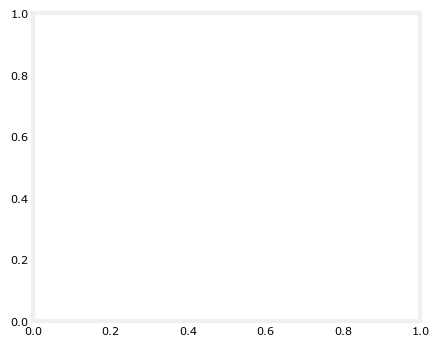

In [103]:
import matplotlib.pyplot as plt
from plt_quad_logistic import plt_quad_logistic, plt_prob
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
print(w_out.shape)
w_out = w_out.reshape(-1, 1)
#print(w_out.shape)

w_pca = pca.fit_transform(w_out)
w_pca_flat = w_pca.flatten()

print(w_pca.shape)
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 

plt_prob(ax, w_pca, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(train_X,train_y,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

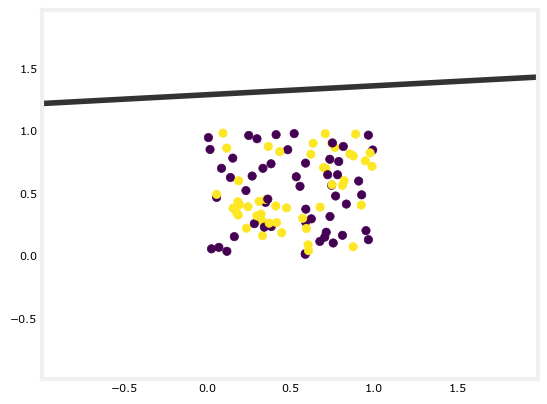

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assume X is your input data and y are your labels
X = np.random.rand(100, 2)
y = np.random.randint(2, size=100)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y)

# Generate a grid over the input space to plot the color of the
#  classification at that grid point
xx, yy = np.mgrid[min(X[:,0])-1:max(X[:,0])+1:.01, min(X[:,1])-1:max(X[:,1])+1:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

plt.show()